# Application du programme MCMC

On importe les bibliothèques et nos variables :

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from MLE import MLE
from MCMC import *

np.random.seed(0)

LAMBDA = 2 # pour le prior sur alpha
SIGMA = 100 # pour le prior sur les Z
DIMENSIONS = 2 # dimension
ITERATIONS = 10_000 # nombre d'itération

SAVE = 100 # nombre de point sauvegardés
FREQ = ITERATIONS // SAVE  # = 100

data = np.loadtxt("data/Florentine_families.csv", delimiter=",") # importe matrice
n = np.shape(data)[0]  # = 15

On crée une fonction log vraissemblance pour la calculer :

In [5]:
def log_vraissemblance(alpha: float, Z: np.matrix, Y: np.matrix) -> float:
    """
    Cette fonction calcule la log vraissemblance pour alpha et Z donnés
    """
    log_vrai = 0
    for i in range(n):
        for j in range(n):
            if i == j:
                continue
            eta = alpha - np.linalg.norm(Z[i] - Z[j])
            log_vrai += Y[i][j] * eta - np.log(1 + np.exp(eta))
    return log_vrai

On fait tourner le programme et on affiche les résultats :

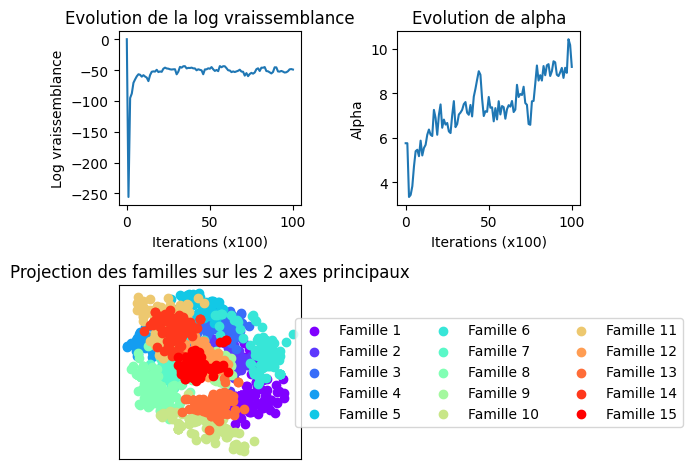

In [6]:
def main(
    Y: np.matrix, n_iter: int = ITERATIONS, n_save: int = SAVE
) -> tuple[list[float], list[np.matrix], list[float]]:
    """
    Cette fonction prend une matrice Y de données et renvoie une liste de alpha et une matrice Z.
    On initialise Z avec le MLE de Y.
    """
    Z = MLE(Y, DIMENSIONS)
    for i in range(n):
        Z[i] = np.random.multivariate_normal(
            [0 for _ in range(DIMENSIONS)], SIGMA ** (1 / 2) * np.identity(DIMENSIONS)
        )
    alpha = np.random.exponential(2)
    alphas = [alpha]
    Z_liste = [Z]
    log_vraissemblance_liste = [0]
    freq_save = n_iter // n_save
    for i in range(n_iter):
        alpha, Z = MCMC(alpha, Z, data)
        if i % freq_save == 0:
            alphas.append(alpha)
            Z_liste.append(Z)
            log_vraissemblance_liste.append(log_vraissemblance(alpha, Z, Y))
    return alphas, Z_liste, log_vraissemblance_liste

if __name__ == "__main__":
    alpha_liste, Z_liste, log_vraissemblance_liste = main(data)

    fig, axes = plt.subplots(2, 2)

    axes[0, 0].plot(log_vraissemblance_liste)
    axes[0, 0].set_title("Evolution de la log vraissemblance")
    axes[0, 0].set_xlabel(f"Iterations (x{FREQ})")
    axes[0, 0].set_ylabel("Log vraissemblance")

    axes[0, 1].plot(alpha_liste)
    axes[0, 1].set_title("Evolution de alpha")
    axes[0, 1].set_xlabel(f"Iterations (x{FREQ})")
    axes[0, 1].set_ylabel("Alpha")

    colors = plt.cm.rainbow(np.linspace(0, 1, n))
    for famille in range(n):
        Z_famille = [Z[famille] for Z in Z_liste]
        axes[1, 0].scatter(
            [Z[0] for Z in Z_famille],
            [Z[1] for Z in Z_famille],
            label=f"Famille {famille+1}",
            color=colors[famille],
        )

    axes[1, 0].set_title("Projection des familles sur les 2 axes principaux")
    axes[1, 0].set_xticks([])
    axes[1, 0].set_yticks([])

    axes[1, 1].axis("off")
    axes[1, 1].legend(*axes[1, 0].get_legend_handles_labels(), ncol=3, loc="center")

    plt.tight_layout()
    plt.show()

On fait de même en trois dimensions : 

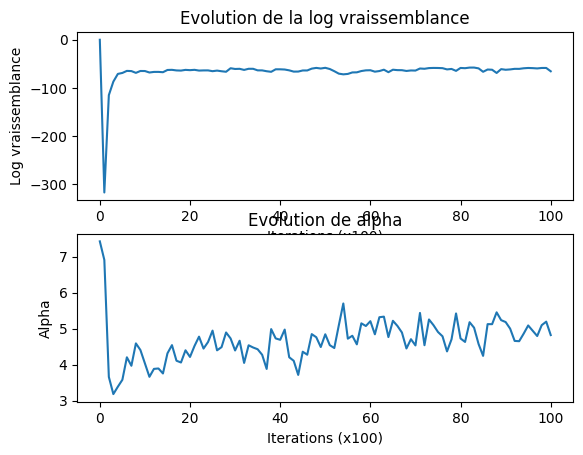

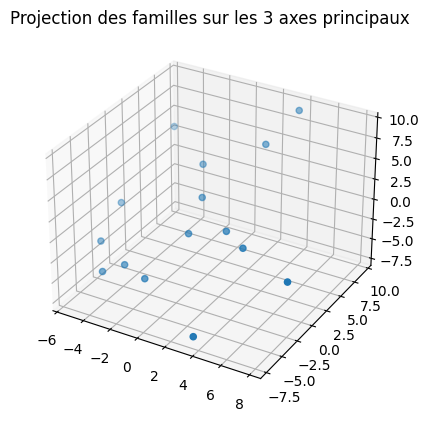

In [13]:
DIMENSIONS = 2 # dimension

if __name__ == "__main__":
    alpha_liste, Z_liste, log_vraissemblance_liste = main(data)

    fig, axes = plt.subplots(2)

    axes[0].plot(log_vraissemblance_liste)
    axes[0].set_title("Evolution de la log vraissemblance")
    axes[0].set_xlabel(f"Iterations (x{FREQ})")
    axes[0].set_ylabel("Log vraissemblance")

    axes[1].plot(alpha_liste)
    axes[1].set_title("Evolution de alpha")
    axes[1].set_xlabel(f"Iterations (x{FREQ})")
    axes[1].set_ylabel("Alpha")

    plt.show()

    fig = plt.figure()
    axes = fig.add_subplot(111, projection='3d')

    colors = plt.cm.rainbow(np.linspace(0, 1, n))

    Z_array = np.array(Z_liste)

    # Calculer la moyenne le long de l'axe des temps (axis=1)
    Z_mean = np.mean(Z_array, axis=0)

    axes.scatter(
    [Z[0] for Z in Z_mean],
    [Z[1] for Z in Z_mean],
    [Z[1] for Z in Z_mean],
        )

    axes.set_title("Projection des familles sur les 3 axes principaux")
    plt.show()